<h1>Multi-class Logistic Regression</h1>
<h4>Implementing one-vs-all logistic regression to recognize hand-written digits.</h4>
<h3>Loading the data</h3>

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
from scipy.io import loadmat
import scipy.optimize as opt
from scipy.optimize import minimize

%matplotlib inline

In [2]:
#using load mat to load the matlab files in 
data = loadmat("Formulas and Datasets/ex3data1.mat")

X = data['X']
y = data['y']

<h3>Visualizing subset of the training set</h3>

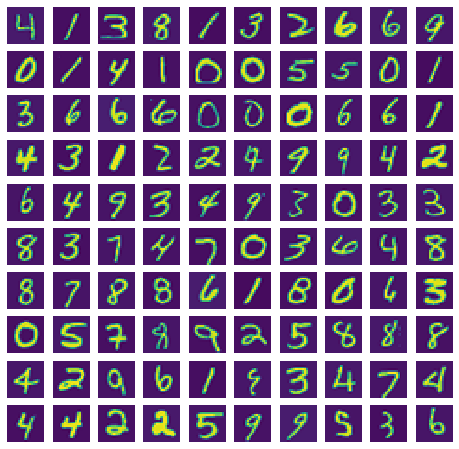

In [3]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"))
        
        axis[i,j].axis("off")

<h3>Adding the intercept term</h3>

In [4]:
m = len(y)
N = X.shape[1]
ones = np.ones((m,1)) # an array of size 5000 x 1
X = np.hstack((ones,X)) #intercept
(m,n) = X.shape

In [5]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

<h3>Implementing the vectorized cost and vectorized gradient function</h3>

In [6]:
cost_history = []
    
def lrCostFunction(theta, X, y, lmbda):
    global cost_history
    m = len(y)
    J = (-1/m) * (y.T @ np.log(sigmoid(X @ theta)) + (1 - y.T) @ np.log(1 - sigmoid(X @ theta)))
    reg = (lmbda/(2*m)) * (theta[1:].T @ theta[1:])
    cost = J + reg
    
   # grad = 1 / m * (sigmoid(theta.dot(X.T)) - y).dot(X) + lmbda / m * np.hstack(([0], theta[1:]))
    
    cost_history.append(cost)
    return cost

In [13]:
grad = []
def gradRegularization(theta, X, y, lmbda):
    global grad
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda /m
    
    grad.append(temp)
    
    return temp

<h3>Finding the cost at initial theta</h3>

In [8]:
theta0 = np.zeros(N + 1)

cost_0 = lrCostFunction(theta0, X, y, 1)

print ('Cost at initial theta (zeros): %.3f' % cost_0)

Cost at initial theta (zeros): 160.394


<h3>Optimizing parameters</h3>

Since we have 10 different models, we need to find the optimal parameters for each model, this is why we use the for loop

In [12]:
lmbda = 0.1
theta = np.zeros((10,n)) # initial parameters

for i in range(10):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = lrCostFunction, x0 = theta[i],  fprime = gradRegularization, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)
    

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.014702
         Iterations: 50
         Function evaluations: 180
         Gradient evaluations: 180
         Current function value: 0.056400
         Iterations: 50
         Function evaluations: 140
         Gradient evaluations: 140
         Current function value: 0.061954
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037395
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063680
         Iterations: 50
         Function evaluations: 131
         Gradient evaluations: 131
         Current function value: 0.020035
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.032986
      

<h3>Making predictions using the One-vs-all Technique</h3>

Compute the "probability' that it belongs to each class using the trained logistic regression classifiers. Return the prediction vector to find the model accuracy.

In [33]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [i if i else 10 for i in pred]
print('The train accuracy is: ')
print(np.mean(pred == y.flatten())*100)

print('The cost after 50 iterations of gradient descent is: ')
print(cost_history[50])

The train accuracy is: 
95.06
The cost after 50 iterations of gradient descent is: 
0.01960196541599473


<h3>Plotting the cost over the first 50 iterations of gradient descent</h3>

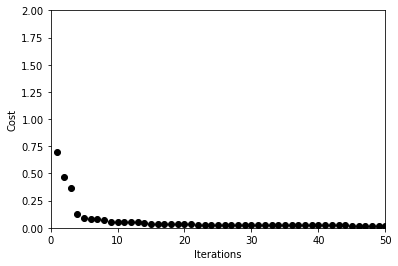

In [34]:
steps = len(cost_history)
plt.scatter(np.arange(steps),cost_history, c='k', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.ylim(0,2)
plt.xlim(0,50)
plt.show()

## 